In [42]:
import pickle
from tensorflow.keras.models import load_model
from scikeras.wrappers import KerasClassifier


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [38]:
# Importamos el csv
FICHERO_DATA = 'data/data_reviews.csv'
df = pd.read_csv(FICHERO_DATA)
df.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad,coherencia
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0,5.640761e-02,3,0,0.0,0.0,0.920000
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0,5.551115e-17,2,0,0.0,0.0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0,5.749596e-02,5,0,0.0,0.0,0.857143
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0,7.866846e-02,5,0,0.0,0.0,0.823529
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0,7.357145e-02,4,0,0.0,0.0,0.953488


In [25]:
# Cargar el modelo desde HDF5
model = load_model('data/modelo_LSTM.h5')

# Cargar los datos preprocesados desde el archivo pickle
with open('data/datos_preprocesados.pkl', 'rb') as file:
    data = pickle.load(file)
    X_test_numerical_scaled = data['X_test_numerical_scaled']
    X_test_text_padded = data['X_test_text_padded']
    y_test = data['y_test']

c:\Users\pabma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
# Evaluar el modelo
loss, accuracy = model.evaluate([X_test_numerical_scaled, X_test_text_padded], y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7610 - loss: 0.4633
Pérdida en el conjunto de prueba: 0.45359498262405396
Precisión en el conjunto de prueba: 0.784931480884552


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
y_test shape: (730,)
y_pred_classes shape: (730,)
y_test unique values: [0 1]
y_pred_classes unique values: [0 1]


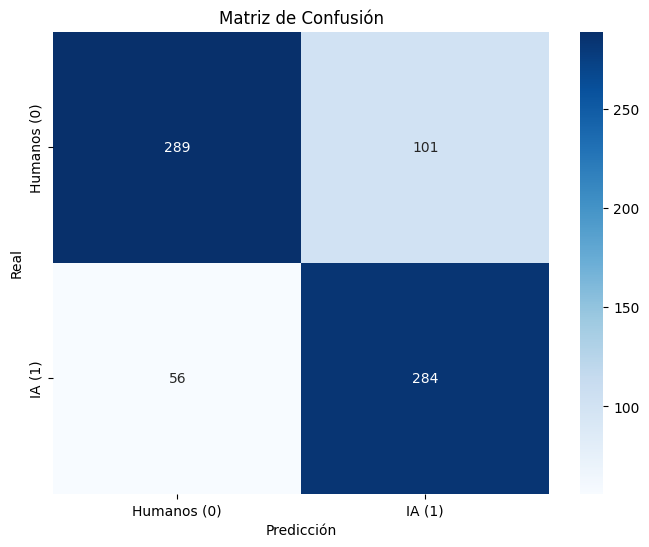

In [30]:
# Obtener probabilidades de las predicciones
y_prob = model.predict([X_test_numerical_scaled, X_test_text_padded])
# Convertir probabilidades en clases binarias
y_pred_classes = (y_prob > 0.5).astype(int).flatten()

# Convertir "y_test" a un array NumPy si no lo es ya
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test).flatten()

# Asegurarse de que "y_pred_classes" sea un array NumPy
if not isinstance(y_pred_classes, np.ndarray):
    y_pred_classes = np.array(y_pred_classes).flatten()

# Verificar dimensiones y valores únicos
print(f'y_test shape: {y_test.shape}')
print(f'y_pred_classes shape: {y_pred_classes.shape}')
print(f'y_test unique values: {np.unique(y_test)}')
print(f'y_pred_classes unique values: {np.unique(y_pred_classes)}')

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Humanos (0)', 'IA (1)'], 
            yticklabels=['Humanos (0)', 'IA (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [33]:
# Obtener el reporte de clasificación
report = classification_report(y_test, y_pred_classes, target_names=['Humano', 'IA'])
print(report)

              precision    recall  f1-score   support

      Humano       0.84      0.74      0.79       390
          IA       0.74      0.84      0.78       340

    accuracy                           0.78       730
   macro avg       0.79      0.79      0.78       730
weighted avg       0.79      0.78      0.79       730

